In [1]:
import pandas as pd
df = pd.read_csv('BTC-EUR.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment', 'google_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000
mean,1.520273e+09,9320.509286,9320.737143,9320.514286,9320.733571,0.237027,0.105464,1.060582e+06,0.037731,0.170432
std,2.509980e+02,1.036974,1.230819,1.037309,1.230601,0.254461,0.000643,3.009151e+03,0.001809,0.000000
min,1.520272e+09,9320.000000,9320.010000,9320.000000,9320.000000,0.010000,0.104927,1.057228e+06,0.034975,0.170432
25%,1.520273e+09,9320.000000,9320.010000,9320.010000,9320.010000,0.043434,0.104927,1.057236e+06,0.035940,0.170432
50%,1.520273e+09,9320.000000,9320.010000,9320.010000,9320.010000,0.153355,0.104928,1.063079e+06,0.038833,0.170432
75%,1.520273e+09,9320.010000,9321.510000,9320.010000,9321.502500,0.294649,0.106179,1.063094e+06,0.038833,0.170432
max,1.520273e+09,9323.100000,9323.100000,9323.100000,9323.100000,0.784878,0.106180,1.063105e+06,0.038833,0.170432


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.069245,0.195412,-0.069134,0.197314,0.052729,0.859132,-0.858183,0.784465,NaN
low,-0.069245,1.000000,0.747004,0.999988,0.746260,-0.236704,0.006231,-0.007761,-0.312169,NaN
high,0.195412,0.747004,1.000000,0.747967,0.999992,-0.023254,0.220964,-0.222462,-0.145500,NaN
open,-0.069134,0.999988,0.747967,1.000000,0.747220,-0.235619,0.007674,-0.009208,-0.312068,NaN
close,0.197314,0.746260,0.999992,0.747220,1.000000,-0.022036,0.222394,-0.223889,-0.143431,NaN
volume,0.052729,-0.236704,-0.023254,-0.235619,-0.022036,1.000000,0.123011,-0.122888,0.288727,NaN
tw_sentiment,0.859132,0.006231,0.220964,0.007674,0.222394,0.123011,1.000000,-0.999997,0.547493,NaN
tw_followers,-0.858183,-0.007761,-0.222462,-0.009208,-0.223889,-0.122888,-0.999997,1.000000,-0.545839,NaN
reddit_sentiment,0.784465,-0.312169,-0.145500,-0.312068,-0.143431,0.288727,0.547493,-0.545839,1.000000,NaN
google_sentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


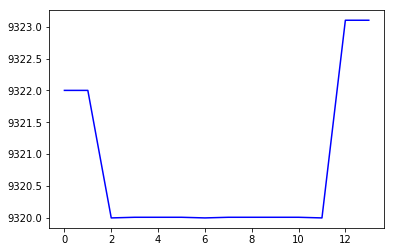

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['close'], 'b')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers', 'google_sentiment']]
y = df['close'].values.reshape(-1, 1)

In [7]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, shuffle=False)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(9, 1, 5)

In [10]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])
history = model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=150, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 485,801
Trainable params: 485,801
Non-trainable params: 0
_________________________________________________________________


([<matplotlib.lines.Line2D at 0x1207595f8>], 'g')

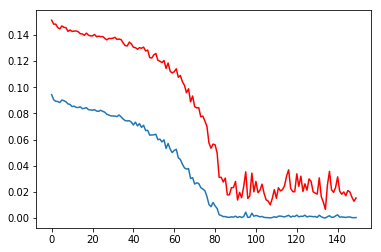

In [11]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

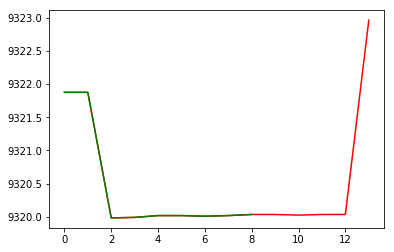

In [12]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [13]:
import time
from enum import Enum

class Order(Enum):
    STAY = 1
    DOWN = 2
    UP = 3

n_error = 0
y_predict_last = y_last = None
for index, row in df.iterrows():
    if y_predict_last is None:
        y_predict_last = y_last = row['open']
        
    x_predict = np.array([row['open'], row['reddit_sentiment'], row['tw_sentiment'], row['tw_followers'], row['google_sentiment']]).reshape(1, -1)
    x_predict = scalerX.transform(x_predict)
    x_predict_reshaped = np.reshape(x_predict, (1, 1, 5))
    y_predict_r = model.predict(x_predict_reshaped)
    y_predict_r_rescaled = scalerY.inverse_transform(y_predict_r)

    predict_order = real_order = Order.DOWN
    if y_predict_last < y_predict_r_rescaled:
        predict_order = Order.UP
    elif y_predict_last == y_predict_r_rescaled:
        predict_order = Order.STAY

    if y_last < row['open']:
        real_order = Order.UP
    elif y_last == row['open']:
        real_order = Order.STAY
    
    y_predict_last = y_predict_r_rescaled
    y_last = row['open']
    
    if real_order != predict_order:
        #print('predicted %s, real %s'% (predict_order, real_order))
        n_error = n_error + 1
        
count = df['open'].count()
percent = (n_error / count) * 100
print("Error Order percentage: %0.2f%%" % percent)

Error Order percentage: 21.43%
